### Importacion y Carga de Datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from prophet import Prophet

# Configurar el estilo de gráficos
sns.set(style='whitegrid')

# Cargar los datos
consumo = pd.read_csv('data/cleanData/CONSUMO.csv', parse_dates=['Fecha'], index_col='Fecha')
importacion = pd.read_csv('data/cleanData/IMPORTACION.csv', parse_dates=['Fecha'], index_col='Fecha')
precios = pd.read_csv('data/cleanData/PRECIOS.csv', parse_dates=['Fecha'], index_col='Fecha')

Especificar Inicio, Fin y Frecuencia

In [5]:
# Especificar información de la serie
print("Consumo: Inicio:", consumo.index.min(), "Fin:", consumo.index.max(), "Frecuencia:", pd.infer_freq(consumo.index))
print("Importación: Inicio:", importacion.index.min(), "Fin:", importacion.index.max(), "Frecuencia:", pd.infer_freq(importacion.index))
print("Precios: Inicio:", precios.index.min(), "Fin:", precios.index.max(), "Frecuencia:", pd.infer_freq(precios.index))

Consumo: Inicio: 2000-01-01 00:00:00 Fin: 2024-05-01 00:00:00 Frecuencia: MS
Importación: Inicio: 2001-01-01 00:00:00 Fin: 2024-05-01 00:00:00 Frecuencia: MS
Precios: Inicio: 2021-01-01 00:00:00 Fin: 2024-08-01 00:00:00 Frecuencia: None


### Graficos de las series

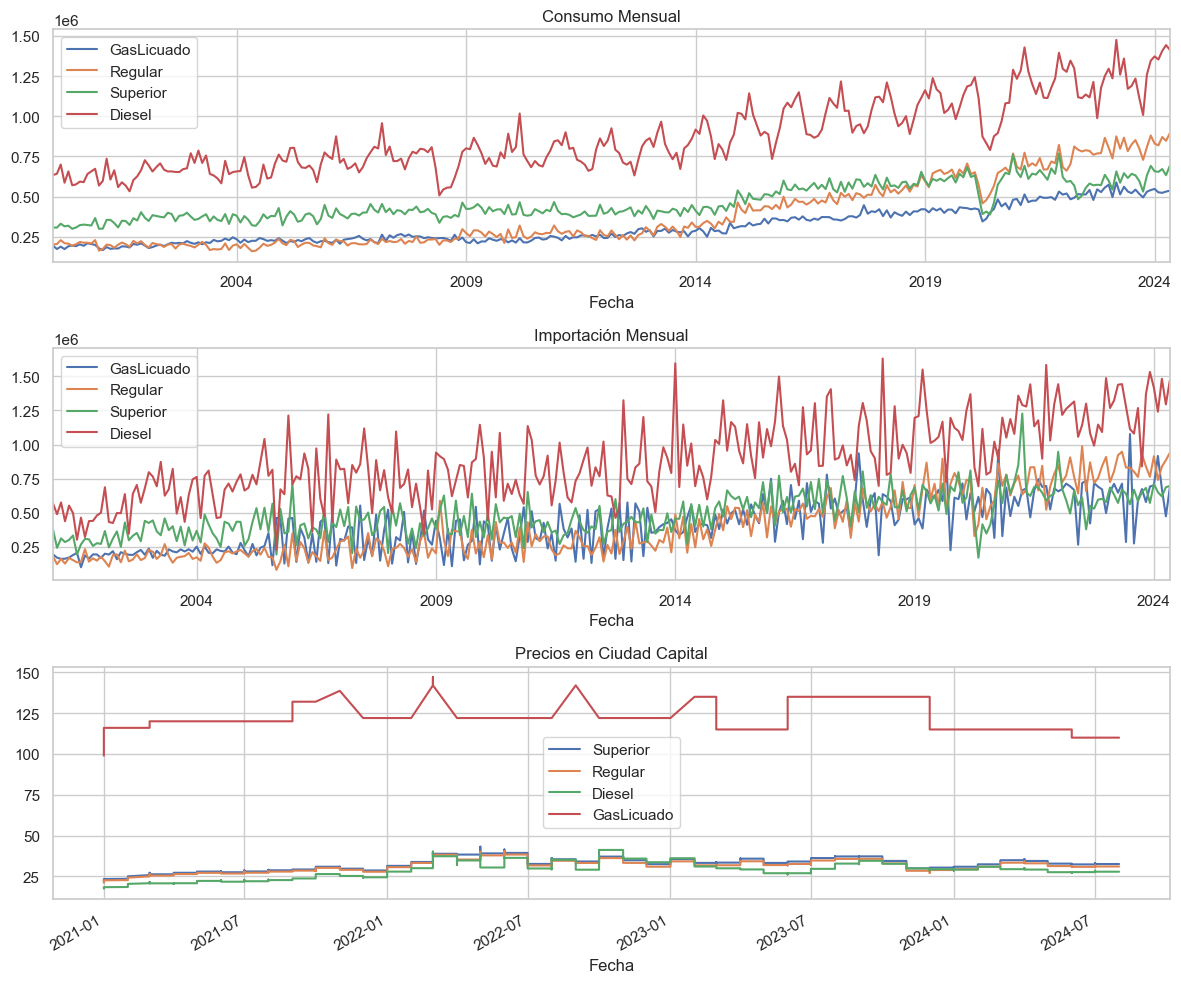

In [6]:
# Gráficos de las series
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
consumo.plot(ax=axes[0], title='Consumo Mensual')
importacion.plot(ax=axes[1], title='Importación Mensual')
precios.plot(ax=axes[2], title='Precios en Ciudad Capital')
plt.tight_layout()
plt.show()

Descomposicion de la Serie

In [10]:
# Encontrar fechas duplicadas
duplicates = precios.index.duplicated()
if duplicates.any():
    print("Fechas duplicadas encontradas:")
    print(precios.index[duplicates])
else:
    print("No se encontraron fechas duplicadas.")


Fechas duplicadas encontradas:
DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01',
               ...
               '2024-07-01', '2024-07-01', '2024-07-01', '2024-07-01',
               '2024-07-01', '2024-07-01', '2024-07-01', '2024-07-01',
               '2024-07-01', '2024-07-01'],
              dtype='datetime64[ns]', name='Fecha', length=1265, freq=None)


In [11]:
# Eliminar duplicados manteniendo la primera ocurrencia
precios = precios[~precios.index.duplicated(keep='first')]

# Ahora intenta definir la frecuencia
precios = precios.asfreq('MS')

### Descomposicion GasLicuado

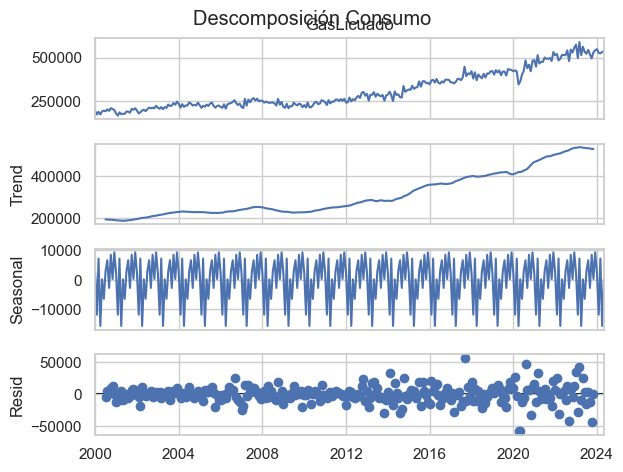

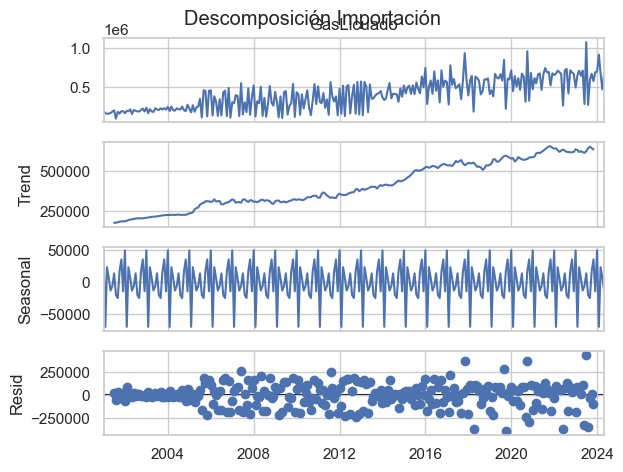

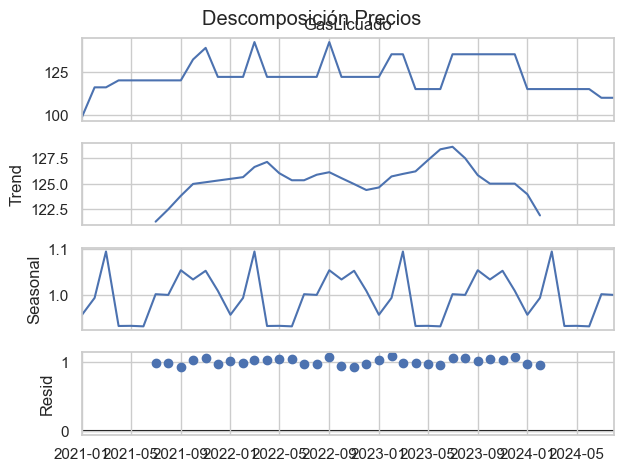

In [17]:
# frecuencia definida
consumo = consumo.asfreq('MS')
importacion = importacion.asfreq('MS')
precios = precios.asfreq('MS')

# Descomposición de las series de tiempo
decomposition_consumo = seasonal_decompose(consumo['GasLicuado'], model='additive')
decomposition_importacion = seasonal_decompose(importacion['GasLicuado'], model='additive')
decomposition_precios = seasonal_decompose(precios['GasLicuado'], model='multiplicative')

# Gráficos de descomposición
decomposition_consumo.plot().suptitle('Descomposición Consumo')
decomposition_importacion.plot().suptitle('Descomposición Importación')
decomposition_precios.plot().suptitle('Descomposición Precios')
plt.show()


### Descomposicion Diesel

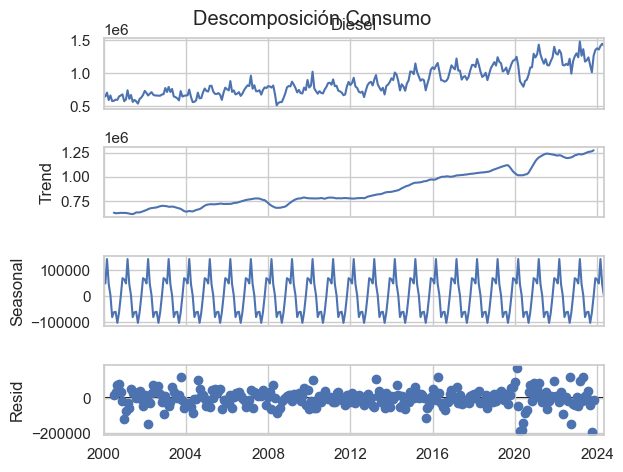

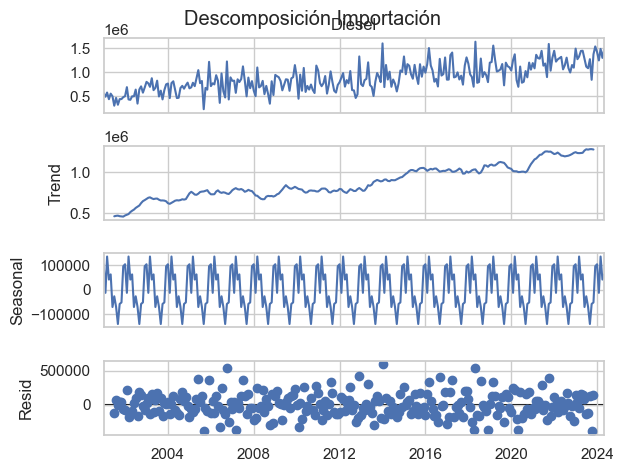

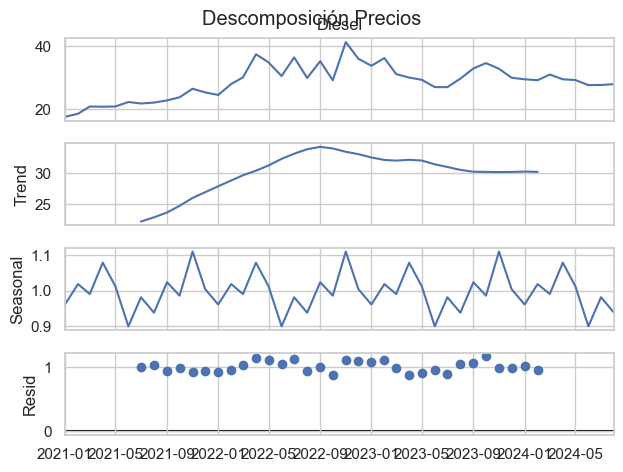

In [18]:
# frecuencia definida
consumo = consumo.asfreq('MS')
importacion = importacion.asfreq('MS')
precios = precios.asfreq('MS')

# Descomposición de las series de tiempo
decomposition_consumo = seasonal_decompose(consumo['Diesel'], model='additive')
decomposition_importacion = seasonal_decompose(importacion['Diesel'], model='additive')
decomposition_precios = seasonal_decompose(precios['Diesel'], model='multiplicative')

# Gráficos de descomposición
decomposition_consumo.plot().suptitle('Descomposición Consumo')
decomposition_importacion.plot().suptitle('Descomposición Importación')
decomposition_precios.plot().suptitle('Descomposición Precios')
plt.show()



### Descomposicion Regular

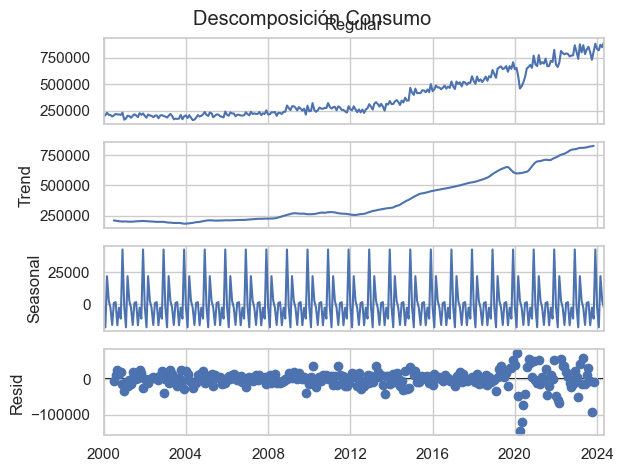

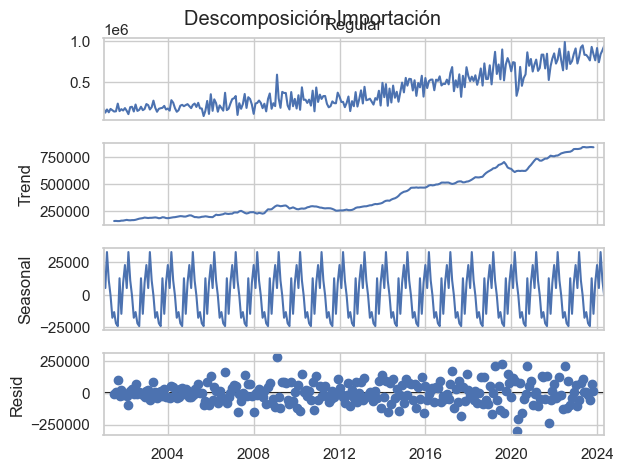

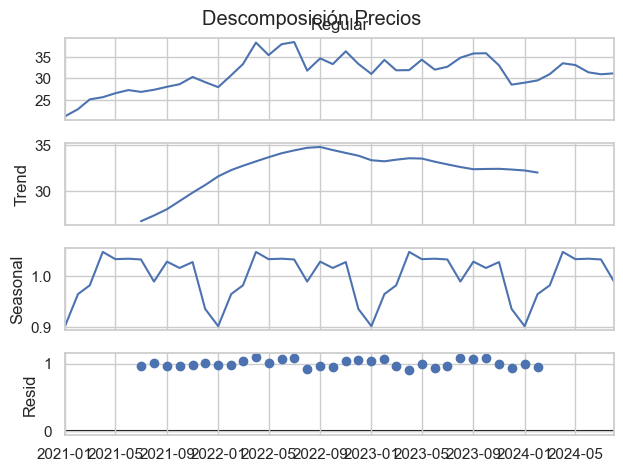

In [19]:
# frecuencia definida
consumo = consumo.asfreq('MS')
importacion = importacion.asfreq('MS')
precios = precios.asfreq('MS')

# Descomposición de las series de tiempo
decomposition_consumo = seasonal_decompose(consumo['Regular'], model='additive')
decomposition_importacion = seasonal_decompose(importacion['Regular'], model='additive')
decomposition_precios = seasonal_decompose(precios['Regular'], model='multiplicative')

# Gráficos de descomposición
decomposition_consumo.plot().suptitle('Descomposición Consumo')
decomposition_importacion.plot().suptitle('Descomposición Importación')
decomposition_precios.plot().suptitle('Descomposición Precios')
plt.show()

### Descomposicion Super

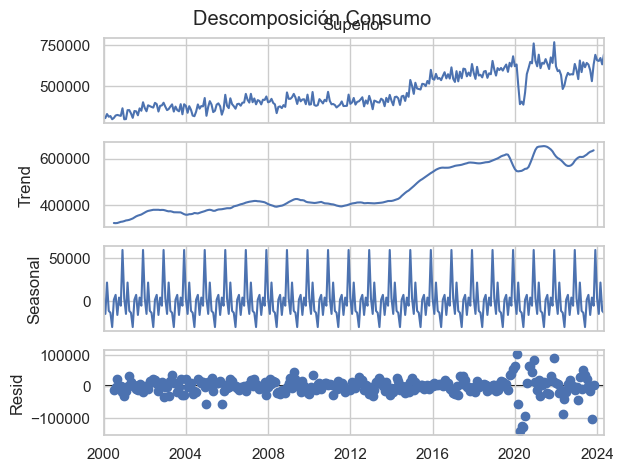

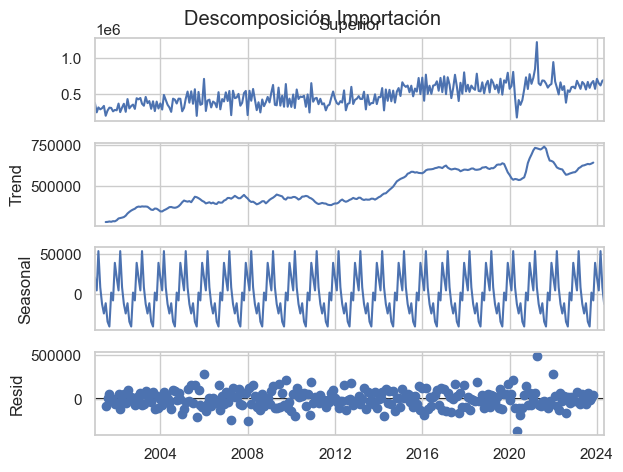

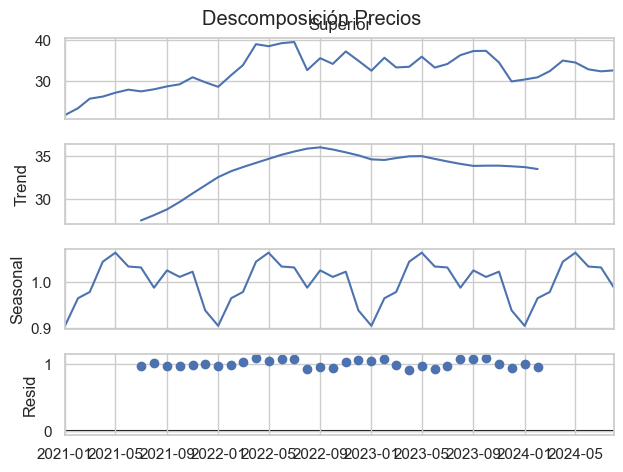

In [22]:
# frecuencia definida
consumo = consumo.asfreq('MS')
importacion = importacion.asfreq('MS')
precios = precios.asfreq('MS')

# Descomposición de las series de tiempo
decomposition_consumo = seasonal_decompose(consumo['Superior'], model='additive')
decomposition_importacion = seasonal_decompose(importacion['Superior'], model='additive')
decomposition_precios = seasonal_decompose(precios['Superior'], model='multiplicative')

# Gráficos de descomposición
decomposition_consumo.plot().suptitle('Descomposición Consumo')
decomposition_importacion.plot().suptitle('Descomposición Importación')
decomposition_precios.plot().suptitle('Descomposición Precios')
plt.show()

### Estacionaiedad

In [25]:
# Función para la prueba de Dickey-Fuller Aumentada
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string()) 
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

# Aplicar la prueba
print("GAS LICUADO")
adf_test(consumo['GasLicuado'], title='Consumo GasLicuado')
adf_test(importacion['GasLicuado'], title='Importación GasLicuado')
adf_test(precios['GasLicuado'], title='Precios GasLicuado')
print()
print("--------------------------------------------------------")
print()
print("DIESEL")
adf_test(consumo['Diesel'], title='Consumo Diesel')
adf_test(importacion['Diesel'], title='Importación Diesel')
adf_test(precios['Diesel'], title='Precios Diesel')
print()
print("--------------------------------------------------------")
print()
print("REGULAR")
adf_test(consumo['Regular'], title='Consumo Regular')
adf_test(importacion['Regular'], title='Importación Regular')
adf_test(precios['Regular'], title='Precios Regular')
print()
print("--------------------------------------------------------")
print()
print("SUPERIOR")
adf_test(consumo['Superior'], title='Consumo Superior')
adf_test(importacion['Superior'], title='Importación Superior')
adf_test(precios['Superior'], title='Precios Superior')

GAS LICUADO
Augmented Dickey-Fuller Test: Consumo GasLicuado
ADF Test Statistic        0.866215
p-value                   0.992633
# Lags Used               6.000000
# Observations          286.000000
Critical Value (1%)      -3.453423
Critical Value (5%)      -2.871699
Critical Value (10%)     -2.572183
The series is non-stationary.
Augmented Dickey-Fuller Test: Importación GasLicuado
ADF Test Statistic       -0.402306
p-value                   0.909713
# Lags Used              12.000000
# Observations          268.000000
Critical Value (1%)      -3.454988
Critical Value (5%)      -2.872386
Critical Value (10%)     -2.572549
The series is non-stationary.
Augmented Dickey-Fuller Test: Precios GasLicuado
ADF Test Statistic      -4.335579
p-value                  0.000385
# Lags Used              0.000000
# Observations          43.000000
Critical Value (1%)     -3.592504
Critical Value (5%)     -2.931550
Critical Value (10%)    -2.604066
The series is stationary.

----------------------

#### Resumen y Recomendaciones:
- Series No Estacionarias: La mayoría de las series para Gas Licuado, Diesel y Regular no son estacionarias, lo que sugiere que podrían necesitar transformación (diferenciación o estandarización) para hacerlas estacionarias.

- Series Estacionarias: Los datos de precios para Gas Licuado, Regular y Superior, y los datos de importación para Superior son estacionarios y no requieren transformación para el análisis de series temporales.

#### Transformaciones para las series no estacionarias

In [43]:
# Transformaciones para Gas Licuado
consumo['GasLicuado_log'] = np.log(consumo['GasLicuado'])
importacion['GasLicuado_log'] = np.log(importacion['GasLicuado'])

consumo['GasLicuado_diff'] = consumo['GasLicuado_log'].diff().dropna()
importacion['GasLicuado_diff'] = importacion['GasLicuado_log'].diff().dropna()

# Transformaciones para Diesel
consumo['Diesel_log'] = np.log(consumo['Diesel'])
importacion['Diesel_log'] = np.log(importacion['Diesel'])
precios['Diesel_log'] = np.log(precios['Diesel'])

consumo['Diesel_diff'] = consumo['Diesel_log'].diff().dropna()
importacion['Diesel_diff'] = importacion['Diesel_log'].diff().dropna()
precios['Diesel_diff'] = precios['Diesel_log'].diff().dropna()

# Transformaciones para Regular
consumo['Regular_log'] = np.log(consumo['Regular'])
importacion['Regular_log'] = np.log(importacion['Regular'])

consumo['Regular_diff'] = consumo['Regular_log'].diff().dropna()
importacion['Regular_diff'] = importacion['Regular_log'].diff().dropna()

# Transformaciones para Superior
consumo['Superior_log'] = np.log(consumo['Superior'])

consumo['Superior_diff'] = consumo['Superior_log'].diff().dropna()

In [44]:
# Función para la prueba de Dickey-Fuller Aumentada
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string()) 
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

# Aplicar la prueba
print("GAS LICUADO")
adf_test(consumo['GasLicuado_diff'], title='Consumo GasLicuado Diferenciado')
adf_test(importacion['GasLicuado_diff'], title='Importación GasLicuado Diferenciado')
adf_test(precios['GasLicuado'], title='Precios GasLicuado')
print()
print("--------------------------------------------------------")
print()
print("DIESEL")
adf_test(consumo['Diesel_diff'], title='Consumo Diesel')
adf_test(importacion['Diesel_diff'], title='Importación Diesel')
adf_test(precios['Diesel_diff'], title='Precios Diesel')
print()
print("--------------------------------------------------------")
print()
print("REGULAR")
adf_test(consumo['Regular_diff'], title='Consumo Regular')
adf_test(importacion['Regular_diff'], title='Importación Regular')
adf_test(precios['Regular'], title='Precios Regular')
print()
print("--------------------------------------------------------")
print()
print("SUPERIOR")
adf_test(consumo['Superior_diff'], title='Consumo Superior')
adf_test(importacion['Superior'], title='Importación Superior')
adf_test(precios['Superior'], title='Precios Superior')


GAS LICUADO
Augmented Dickey-Fuller Test: Consumo GasLicuado Diferenciado
ADF Test Statistic     -7.794875e+00
p-value                 7.765661e-12
# Lags Used             1.000000e+01
# Observations          2.810000e+02
Critical Value (1%)    -3.453838e+00
Critical Value (5%)    -2.871881e+00
Critical Value (10%)   -2.572280e+00
The series is stationary.
Augmented Dickey-Fuller Test: Importación GasLicuado Diferenciado
ADF Test Statistic     -8.660822e+00
p-value                 4.827963e-14
# Lags Used             1.100000e+01
# Observations          2.680000e+02
Critical Value (1%)    -3.454988e+00
Critical Value (5%)    -2.872386e+00
Critical Value (10%)   -2.572549e+00
The series is stationary.
Augmented Dickey-Fuller Test: Precios GasLicuado
ADF Test Statistic      -4.335579
p-value                  0.000385
# Lags Used              0.000000
# Observations          43.000000
Critical Value (1%)     -3.592504
Critical Value (5%)     -2.931550
Critical Value (10%)    -2.604066
The

Se observa que ya todas las series son estacionarias, procedemos con el modelado ARIMA.

### Modelado ARIMA

#### Serie CONSUMO

In [50]:
# Determinación de p, d, q usando Auto ARIMA

# Gas Licuado
print("GAS LICUADO")
auto_arima_model = auto_arima(consumo['GasLicuado'], seasonal=False, trace=True)
print(auto_arima_model.summary())
print("--------------------------------------------------------")
print()

# Diesel
print("DIESEL")
auto_arima_model = auto_arima(consumo['Diesel'], seasonal=False, trace=True)
print(auto_arima_model.summary())
print("--------------------------------------------------------")
print()

# Regular
print("REGULAR")
auto_arima_model = auto_arima(consumo['Regular'], seasonal=False, trace=True)
print(auto_arima_model.summary())
print("--------------------------------------------------------")
print()

# Superior
print("SUPERIOR")
auto_arima_model = auto_arima(consumo['Superior'], seasonal=False, trace=True)
print(auto_arima_model.summary())
print("--------------------------------------------------------")
print()


GAS LICUADO
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6583.709, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6685.516, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6589.093, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6588.581, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6684.308, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6583.875, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6583.101, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6581.103, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6586.638, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6584.484, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6584.239, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.789 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

                               SARIMAX Results                                
Dep. Variable:             GasLicuado   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3289.120
Date:                Sun, 04 Aug 2024   AIC                           6584.239
Time:                        18:14:02   BIC                           6595.269
Sample:                    01-01-2000   HQIC                          6588.657
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2169      0.054     -3.999      0.000      -0.323      -0.111
ma.L1         -0.3793      0.065     -5.807      0.000      -0.507      -0.251
sigma2      3.347e+08   2.56e-11   1.31e+19      0.0

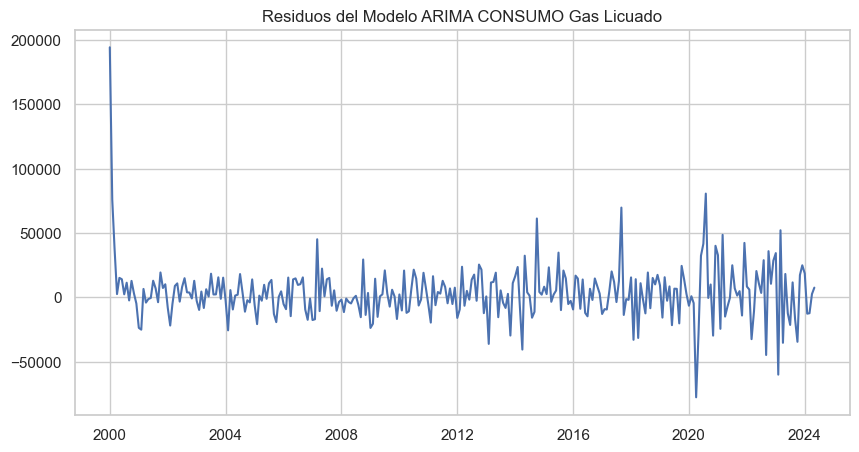

AIC: 6584.239024169825, BIC: 6595.26928557663
                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  293
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3718.653
Date:                Sun, 04 Aug 2024   AIC                           7441.306
Time:                        18:14:03   BIC                           7448.659
Sample:                    01-01-2000   HQIC                          7444.251
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1605      0.043     -3.733      0.000      -0.245      -0.076
sigma2      6.721e+09   4.09e-13   1.64e+22      0.000    6.72e+09    6.72e+09
Ljung-

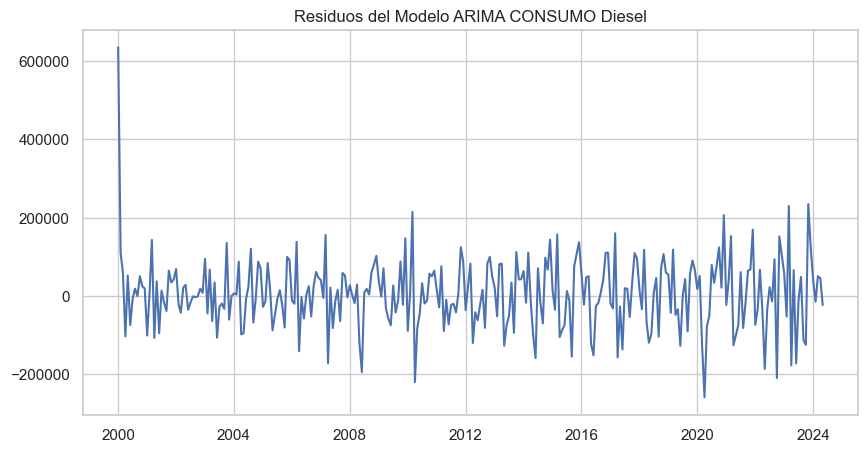

AIC: 7441.305601900973, BIC: 7448.659109505509
                               SARIMAX Results                                
Dep. Variable:                Regular   No. Observations:                  293
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3463.080
Date:                Sun, 04 Aug 2024   AIC                           6934.159
Time:                        18:14:03   BIC                           6948.866
Sample:                    01-01-2000   HQIC                          6940.050
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8142      0.107     -7.633      0.000      -1.023      -0.605
ma.L1          0.3403      0.106      3.195      0.001       0.132       0.549
ma.L2

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


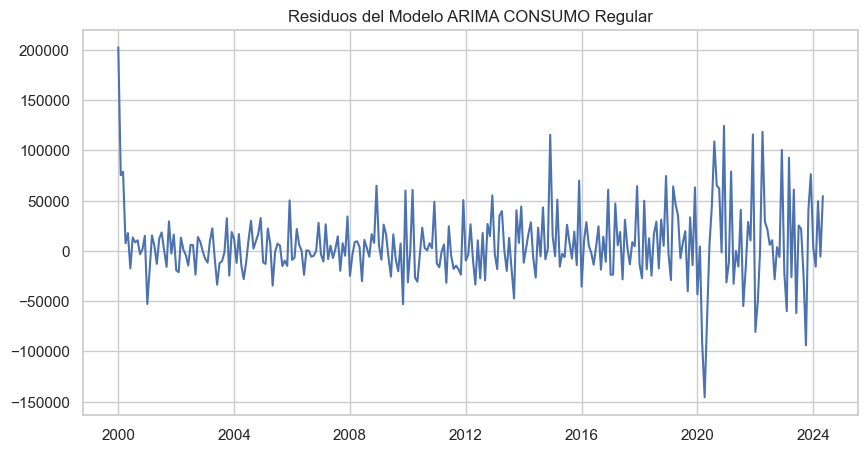

AIC: 6934.159064080641, BIC: 6948.8660792897135
                               SARIMAX Results                                
Dep. Variable:               Superior   No. Observations:                  293
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3502.247
Date:                Sun, 04 Aug 2024   AIC                           7008.494
Time:                        18:14:04   BIC                           7015.847
Sample:                    01-01-2000   HQIC                          7011.439
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4115      0.033    -12.656      0.000      -0.475      -0.348
sigma2      1.499e+09   5.44e-12   2.75e+20      0.000     1.5e+09     1.5e+09
Ljun

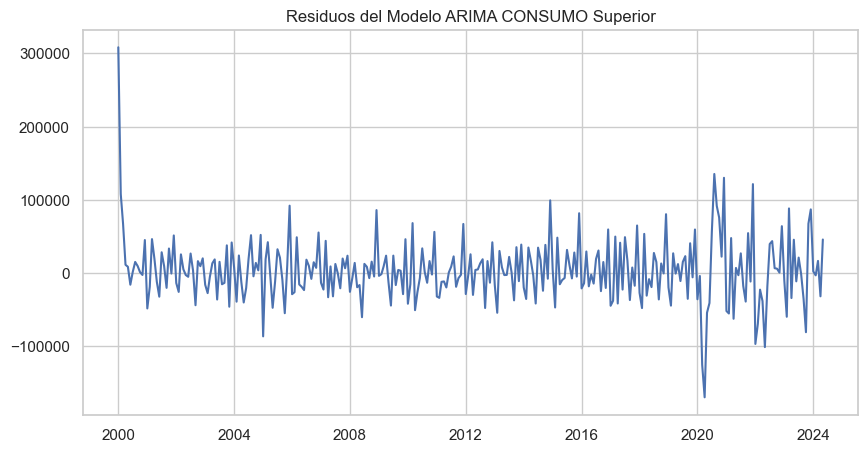

AIC: 7008.4935513905175, BIC: 7015.847058995054


In [53]:
# modelo ARIMA para GAS LICUADO
model_gasLicuado = ARIMA(consumo['GasLicuado'], order=(1, 1, 1))
model_fit_GASLICUADO = model_gasLicuado.fit()

# Evaluar el modelo
print(model_fit_GASLICUADO.summary())

# Gráfico de residuos
residuals_gasLicuado = model_fit_GASLICUADO.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals_gasLicuado)
plt.title('Residuos del Modelo ARIMA CONSUMO Gas Licuado')
plt.show()

# Métricas AIC y BIC
print(f'AIC: {model_fit_GASLICUADO.aic}, BIC: {model_fit_GASLICUADO.bic}')

# modelo ARIMA para DIESEL
model_diesel = ARIMA(consumo['Diesel'], order=(1, 1, 0))
model_fit_DIESEL = model_diesel.fit()

# Evaluar el modelo
print(model_fit_DIESEL.summary())

# Gráfico de residuos
residuals_diesel = model_fit_DIESEL.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals_diesel)
plt.title('Residuos del Modelo ARIMA CONSUMO Diesel')
plt.show()

# Métricas AIC y BIC
print(f'AIC: {model_fit_DIESEL.aic}, BIC: {model_fit_DIESEL.bic}')

# modelo ARIMA para REGULAR
model_regular = ARIMA(consumo['Regular'], order=(1, 1, 2))
model_fitREGULAR = model_regular.fit()

# Evaluar el modelo
print(model_fitREGULAR.summary())

# Gráfico de residuos
residuals_regular = model_fitREGULAR.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals_regular)
plt.title('Residuos del Modelo ARIMA CONSUMO Regular')
plt.show()

# Métricas AIC y BIC
print(f'AIC: {model_fitREGULAR.aic}, BIC: {model_fitREGULAR.bic}')

# modelo ARIMA para SUPERIOR
model_superior = ARIMA(consumo['Superior'], order=(0, 1, 1))
model_fitSUPER = model_superior.fit()

# Evaluar el modelo
print(model_fitSUPER.summary())

# Gráfico de residuos
residuals_superior = model_fitSUPER.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals_superior)
plt.title('Residuos del Modelo ARIMA CONSUMO Superior')
plt.show()

# Métricas AIC y BIC
print(f'AIC: {model_fitSUPER.aic}, BIC: {model_fitSUPER.bic}')
